In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv('911.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [8]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [9]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [10]:
df['title'].nunique()

110

In [11]:
x=df['title'].iloc[0]

In [12]:
x.split(':')[0]

'EMS'

In [13]:
df['Reason']=df['title'].apply(lambda title:title.split(':')[0])

In [14]:
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

In [15]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

In [16]:
df['Reason'].value_counts().head(1)

EMS    48877
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

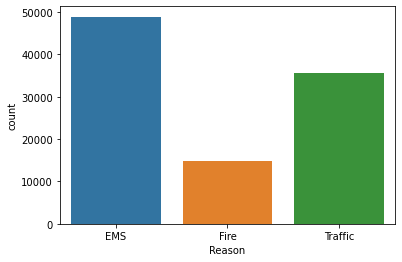

In [17]:
sns.countplot(x='Reason',data=df)

<AxesSubplot:xlabel='Reason', ylabel='count'>

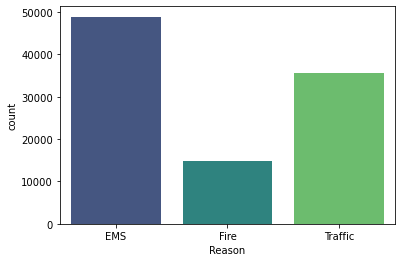

In [19]:
sns.countplot(x='Reason',data=df,palette='viridis')

In [21]:
type(df['timeStamp'].iloc[0])

str

In [22]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [23]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [24]:
time=df['timeStamp'].iloc[0]
time.hour

17

In [26]:
time.minute

40

In [27]:
time

Timestamp('2015-12-10 17:40:00')

In [28]:
time.day

10

In [29]:
time.year

2015

In [30]:
time.second

0

In [32]:
time.date()

datetime.date(2015, 12, 10)

In [33]:
time.day

10

In [34]:
time.dayofweek

3

In [35]:
df['Hour']=df['timeStamp'].apply(lambda time:time.hour)

In [36]:
df['Hour'].iloc[0]

17

In [39]:
df['Month']=df['timeStamp'].apply(lambda time:time.month)
df['Day Of Week']=df['timeStamp'].apply(lambda time:time.dayofweek)

In [40]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day Of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [41]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [42]:
dmap

{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [43]:
df['Day Of Week']=df['Day Of Week'].map(dmap)

In [44]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day Of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


<AxesSubplot:xlabel='Day Of Week', ylabel='count'>

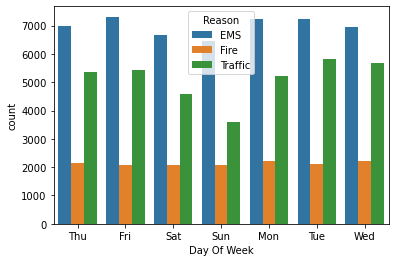

In [47]:
sns.countplot(x='Day Of Week',data=df,hue='Reason')

<AxesSubplot:xlabel='Day Of Week', ylabel='count'>

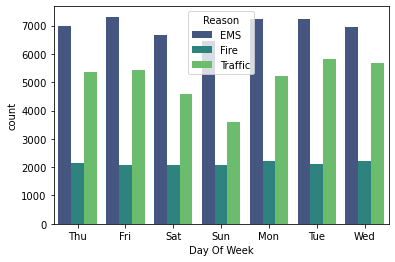

In [48]:
sns.countplot(x='Day Of Week',data=df,hue='Reason',palette='viridis')

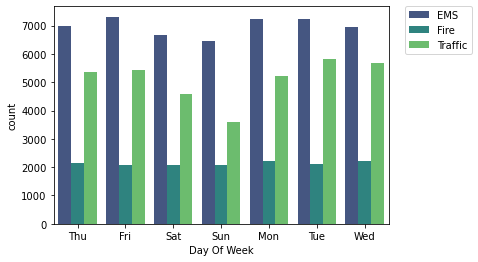

In [49]:
sns.countplot(x='Day Of Week',data=df,hue='Reason',palette='viridis')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

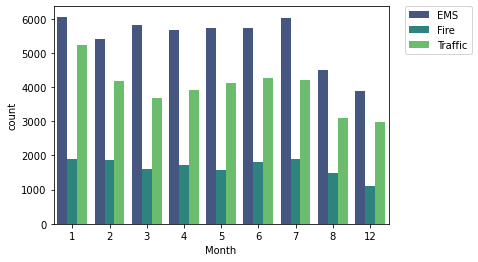

In [50]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

In [51]:
byMonth=df.groupby('Month').count()

In [52]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day Of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


<AxesSubplot:xlabel='Month'>

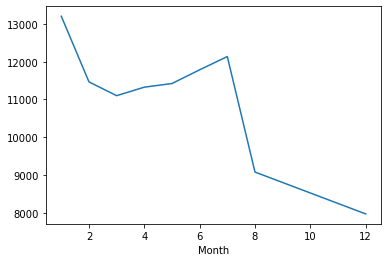

In [53]:
byMonth['lat'].plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


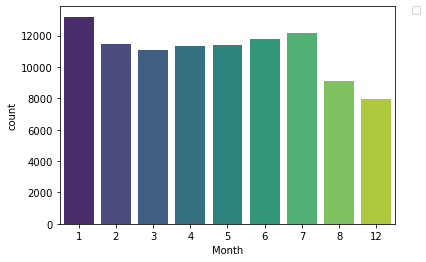

In [54]:
sns.countplot(x='Month',data=df,palette='viridis')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

In [55]:
byMonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day Of Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


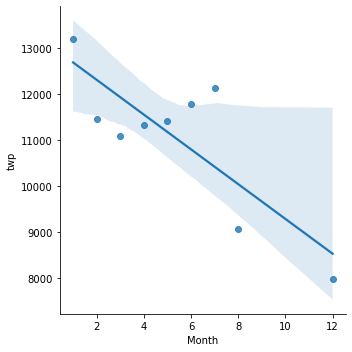

In [56]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [57]:
t=df['timeStamp'].iloc[0]

In [58]:
t

Timestamp('2015-12-10 17:40:00')

In [60]:
t.date()

datetime.date(2015, 12, 10)

In [61]:
df['Date']=df['timeStamp'].apply(lambda t:t.date())

In [62]:
df['Date'].head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: Date, dtype: object

In [63]:
df.groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day Of Week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


In [64]:
df.groupby('Date').count()['lat']

Date
2015-12-10    115
2015-12-11    396
2015-12-12    403
2015-12-13    319
2015-12-14    447
             ... 
2016-08-20    328
2016-08-21    357
2016-08-22    389
2016-08-23    439
2016-08-24    132
Name: lat, Length: 259, dtype: int64

<AxesSubplot:xlabel='Date'>

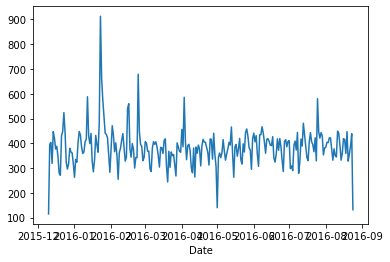

In [65]:
df.groupby('Date').count()['lat'].plot()

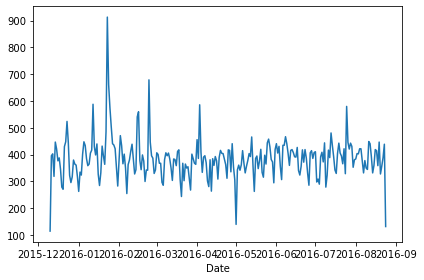

In [66]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

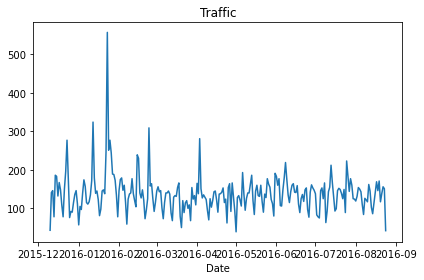

In [68]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

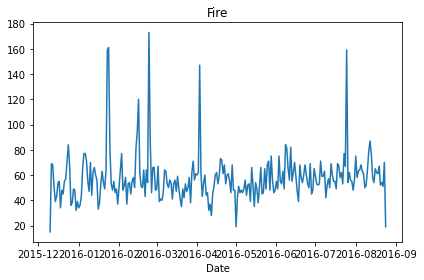

In [70]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

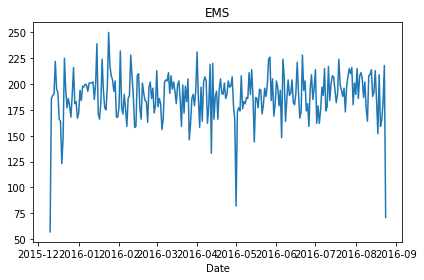

In [71]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

In [72]:
df.groupby(by=['Day Of Week','Hour']).count()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
Day Of Week Hour                                                          
Fri         0     275  275   275  248    275        275  275   275  275   
            1     235  235   235  200    235        235  235   232  235   
            2     191  191   191  165    191        191  191   191  191   
            3     175  175   175  164    175        175  175   175  175   
            4     201  201   201  184    201        201  201   201  201   
...               ...  ...   ...  ...    ...        ...  ...   ...  ...   
Wed         19    686  686   686  590    686        686  686   682  686   
            20    668  668   668  597    668        668  668   662  668   
            21    575  575   575  508    575        575  574   572  575   
            22    490  490   490  432    490        490  490   485  490   
            23    335  335   335  294    335        335  334   335  335   

                  Reason  Month  Date  
Day Of Week Hour                       
Fri         0        275    275   275  
            1        235    235   235  
            2        191    191   191  
            3        175    175   175  
            4        201    201   201  
...                  ...    ...   ...  
Wed         19       686    686   686  
            20       668    668   668  
            21       575    575   575  
            22       490    490   490  
            23       335    335   335  

[168 rows x 12 columns]

In [73]:
df.groupby(by=['Day Of Week','Hour']).count()['Reason']

Day Of Week  Hour
Fri          0       275
             1       235
             2       191
             3       175
             4       201
                    ... 
Wed          19      686
             20      668
             21      575
             22      490
             23      335
Name: Reason, Length: 168, dtype: int64

In [74]:
df.groupby(by=['Day Of Week','Hour']).count()['Reason'].unstack()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day Of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


In [77]:
dayHour=df.groupby(by=['Day Of Week','Hour']).count()['Reason'].unstack()

<AxesSubplot:xlabel='Hour', ylabel='Day Of Week'>

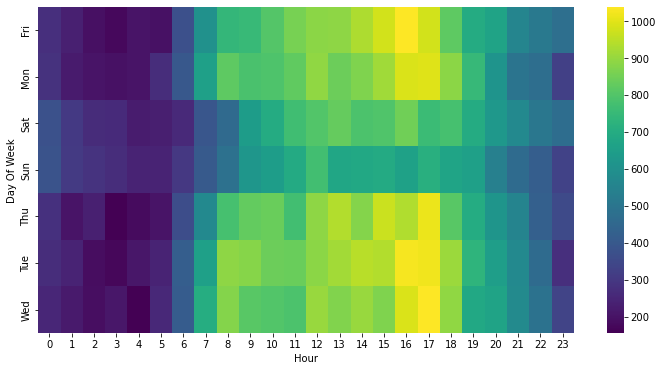

In [78]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

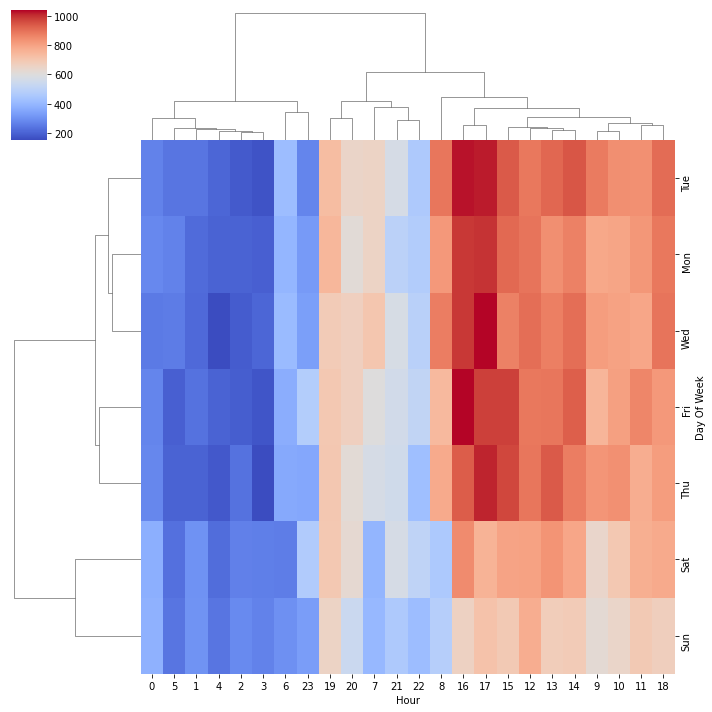

In [79]:
sns.clustermap(dayHour,cmap='coolwarm')

In [80]:
dayMonth=df.groupby(by=['Day Of Week','Month']).count()['Reason'].unstack()

In [81]:
dayMonth

Month,1,2,3,4,5,6,7,8,12
Day Of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


<AxesSubplot:xlabel='Month', ylabel='Day Of Week'>

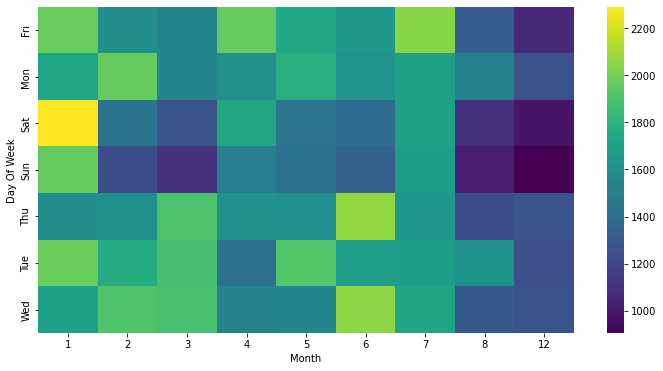

In [82]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

In [87]:
# FINANCE DATA PROJECT

In [88]:
df=pd.read_pickle('all_banks')

In [89]:
df

Bank Ticker    BAC                                      C                  \
Stock Info    Open   High    Low  Close    Volume    Open    High     Low   
Date                                                                        
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.00  493.80  481.10   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.60  491.00  483.50   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.40  487.80  484.00   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.80  489.00  482.00   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.00  487.40  483.00   
...            ...    ...    ...    ...       ...     ...     ...     ...   
2015-12-24   17.32  17.38  17.22  17.27  29373415   52.48   52.97   52.45   
2015-12-28   17.22  17.23  16.98  17.13  41777497   52.57   52.57   51.96   
2015-12-29   17.25  17.35  17.16  17.28  45670376   52.76   53.22   52.74   
2015-12-30   17.20  17.24  17.04  17.05  35066378   52.84   52.94   52.25   
2015-12-31   17.01  17.07  16.83  16.83  47152968   52.07   52.39   51.75   

Bank Ticker                    ...     MS                                \
Stock Info    Close    Volume  ...   Open   High    Low  Close   Volume   
Date                           ...                                        
2006-01-03   492.90   1537660  ...  57.17  58.49  56.74  58.31  5377000   
2006-01-04   483.80   1871020  ...  58.70  59.28  58.35  58.35  7977800   
2006-01-05   486.20   1143160  ...  58.55  58.59  58.02  58.51  5778000   
2006-01-06   486.20   1370250  ...  58.77  58.85  58.05  58.57  6889800   
2006-01-09   483.90   1680740  ...  58.63  59.29  58.62  59.19  4144500   
...             ...       ...  ...    ...    ...    ...    ...      ...   
2015-12-24    52.71   4671254  ...  32.57  32.71  32.44  32.48  2798163   
2015-12-28    52.38   8761743  ...  32.36  32.36  31.95  32.17  5420280   
2015-12-29    52.98  10155134  ...  32.44  32.70  32.32  32.55  6388244   
2015-12-30    52.30   8763337  ...  32.50  32.64  32.20  32.23  5057162   
2015-12-31    51.75  11281771  ...  31.91  32.30  31.77  31.81  8154307   

Bank Ticker    WFC                                 
Stock Info    Open   High    Low  Close    Volume  
Date                                               
2006-01-03   31.60  31.98  31.20  31.90  11016400  
2006-01-04   31.80  31.82  31.36  31.53  10871000  
2006-01-05   31.50  31.56  31.31  31.50  10158000  
2006-01-06   31.58  31.78  31.38  31.68   8403800  
2006-01-09   31.68  31.82  31.56  31.68   5619600  
...            ...    ...    ...    ...       ...  
2015-12-24   54.97  55.09  54.71  54.82   4999417  
2015-12-28   54.55  54.78  54.17  54.68   8288841  
2015-12-29   55.11  55.35  54.99  55.29   7894876  
2015-12-30   55.27  55.31  54.79  54.89   8016893  
2015-12-31   54.51  54.95  54.22  54.36  10929767  

[2517 rows x 30 columns]

In [90]:
df.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

In [91]:
from pandas_datareader import data,wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [92]:
start=datetime.datetime(2006,1,1)

In [93]:
end=datetime.datetime(2016,1,1)

In [99]:
# BAC=data.DataReader('BAC','yahoo',start,end) --> This is more detailed
BAC=data.DataReader('BAC','stooq',start,end)

In [100]:
BAC

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,15.052,15.104,14.891,14.891,53196802.0
2015-12-30,15.221,15.255,15.078,15.088,39582761.0
2015-12-29,15.264,15.354,15.186,15.288,51566649.0
2015-12-28,15.237,15.246,15.024,15.157,47170877.0
2015-12-24,15.325,15.380,15.237,15.281,33195780.0
...,...,...,...,...,...
2006-01-09,40.038,40.253,39.730,39.936,18225560.0
2006-01-06,40.106,40.200,39.723,39.909,14696272.0
2006-01-05,39.918,40.134,39.697,39.971,17296502.0


In [101]:
BAC=data.DataReader('BAC','yahoo',start,end)

In [102]:
BAC

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,33.584076
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,33.227398
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,33.270206
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,33.220276
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,33.241684
...,...,...,...,...,...,...
2015-12-24,17.379999,17.219999,17.320000,17.270000,29369400.0,15.193919
2015-12-28,17.230000,16.980000,17.219999,17.129999,41777500.0,15.070742
2015-12-29,17.350000,17.160000,17.250000,17.280001,45670400.0,15.202715


In [103]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [104]:
MS

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,58.490002,56.740002,57.169998,58.310001,5377000.0,35.558964
2006-01-04,59.279999,58.349998,58.700001,58.349998,7977800.0,35.583363
2006-01-05,58.590000,58.020000,58.549999,58.509998,5778000.0,35.680923
2006-01-06,58.849998,58.049999,58.770000,58.570000,6889800.0,35.717525
2006-01-09,59.290001,58.619999,58.630001,59.189999,4144500.0,36.095612
...,...,...,...,...,...,...
2015-12-24,32.709999,32.439999,32.570000,32.480000,2798200.0,27.602327
2015-12-28,32.360001,31.950001,32.360001,32.169998,5420300.0,27.338879
2015-12-29,32.700001,32.330002,32.439999,32.549999,6388200.0,27.661814


In [105]:
WFC

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,31.975000,31.195000,31.600000,31.900000,11016400.0,20.242821
2006-01-04,31.820000,31.365000,31.799999,31.530001,10870000.0,20.008034
2006-01-05,31.555000,31.309999,31.500000,31.495001,10158000.0,19.985821
2006-01-06,31.775000,31.385000,31.580000,31.680000,8403800.0,20.103214
2006-01-09,31.825001,31.555000,31.674999,31.674999,5619600.0,20.100037
...,...,...,...,...,...,...
2015-12-24,55.090000,54.709999,54.970001,54.820000,4999400.0,45.304947
2015-12-28,54.779999,54.169998,54.549999,54.680000,8288800.0,45.189247
2015-12-29,55.349998,54.990002,55.110001,55.290001,7894900.0,45.693371


In [106]:
GS

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,129.440002,124.230003,126.699997,128.869995,6188700.0,102.626839
2006-01-04,128.910004,126.379997,127.349998,127.089996,4861600.0,101.209267
2006-01-05,127.320000,125.610001,126.000000,127.040001,3717400.0,101.169487
2006-01-06,129.250000,127.290001,127.290001,128.839996,4319600.0,102.602936
2006-01-09,130.619995,128.000000,128.500000,130.389999,4723500.0,103.837296
...,...,...,...,...,...,...
2015-12-24,183.169998,182.020004,182.270004,182.470001,1107600.0,162.612839
2015-12-28,181.929993,179.839996,181.770004,181.619995,1723300.0,161.855347
2015-12-29,184.179993,182.500000,182.820007,183.529999,1848900.0,163.557480


In [107]:
C

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,493.799988,481.100006,490.000000,492.899994,1537600.0,361.662048
2006-01-04,491.000000,483.500000,488.600006,483.799988,1870960.0,354.985107
2006-01-05,487.799988,484.000000,484.399994,486.200012,1143160.0,356.746002
2006-01-06,489.000000,482.000000,488.799988,486.200012,1370210.0,356.746002
2006-01-09,487.399994,483.000000,486.000000,483.899994,1680740.0,355.058350
...,...,...,...,...,...,...
2015-12-24,52.970001,52.450001,52.480000,52.709999,4671200.0,44.856956
2015-12-28,52.570000,51.959999,52.570000,52.380001,8761700.0,44.576126
2015-12-29,53.220001,52.740002,52.759998,52.980000,10155100.0,45.086727


In [108]:
tickers=['BAC','C','GS','JPM','MS','WFC']

In [109]:
bank_stocks=pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)

In [110]:
bank_stocks

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  33.584072   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  33.227406   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  33.270187   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  33.220268   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  33.241653   
...               ...        ...        ...        ...         ...        ...   
2015-12-24  17.379999  17.219999  17.320000  17.270000  29369400.0  15.193916   
2015-12-28  17.230000  16.980000  17.219999  17.129999  41777500.0  15.070746   
2015-12-29  17.350000  17.160000  17.250000  17.280001  45670400.0  15.202714   
2015-12-30  17.240000  17.040001  17.200001  17.049999  35066400.0  15.000362   
2015-12-31  17.070000  16.830000  17.010000  16.830000  47153000.0  14.806808   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   
...                ...         ...         ...         ...  ...        ...   
2015-12-24   52.970001   52.450001   52.480000   52.709999  ...  32.570000   
2015-12-28   52.570000   51.959999   52.570000   52.380001  ...  32.360001   
2015-12-29   53.220001   52.740002   52.759998   52.980000  ...  32.439999   
2015-12-30   52.939999   52.250000   52.840000   52.299999  ...  32.500000   
2015-12-31   52.389999   51.750000   52.070000   51.750000  ...  31.910000   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  35.558964  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  35.583363  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  35.680923  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  35.717525  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  36.095612  31.825001  31.555000  31.674999   
...               ...        ...        ...        ...        ...        ...   
2015-12-24  32.480000  2798200.0  27.602327  55.090000  54.709999  54.970001   
2015-12-28  32.169998  5420300.0  27.338879  54.779999  54.169998  54.549999   
2015-12-29  32.549999  6388200.0  27.661814  55.349998  54.990002  55.110001   
2015-12-30  32.230000  5057200.0  27.389868  55.310001  54.790001  55.270000   
2015-12-31  31.809999  8154300.0  27.032944  54.950001  54.220001  54.509998   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.242821  
2006-01-04  31.530001  10870000.0  20.008034  
2006-01-05  31.495001  10158000.0  19.985821  
2006-01-06  31.680000   8403800.0  20.103214  
2006-01-09  31.674999   5619600.0  20.100037  
...               ...         ...        ...  
2015-12-24  54.820000   4999400.0  45.304947  
2015-12-28  54.680000   8288800.0  45.189247  
2015-12-29  55.290001   7894900.0  45.693371  
2015-12-30  54.889999   8016900.0  45.362793  
2015-12-31  54.360001  10929800.0  44.924789  

[2517 rows

In [111]:
bank_stocks.columns.names=['Bank Ticker','Stock Info']

In [112]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.584072  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.227406  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.270187  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.220268  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.241653  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  35.558964  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  35.583363  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.680923  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  35.717525  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  36.095612  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.242821  
2006-01-04   31.799999  31.530001  10870000.0  20.008034  
2006-01-05   31.500000  31.495001  10158000.0  19.985821  
2006-01-06   31.580000  31.680000   8403800.0  20.103214  
2006-01-09   31.674999  31.674999   5619600.0  20.100037  

[5 rows x 36 columns]

In [113]:
# for tick in tickers:
#     bank_stocks[tick]
bank_stocks['BAC']['Close'].max()

54.900001525878906

In [115]:
for tick in tickers:
    print(tick,bank_stocks[tick]['Close'].max())

BAC 54.900001525878906
C 564.0999755859375
GS 247.9199981689453
JPM 70.08000183105469
MS 89.30000305175781
WFC 58.52000045776367


In [116]:
for tick in tickers:
    print(tick,bank_stocks[tick]['Close'].max())

BAC 54.900001525878906
C 564.0999755859375
GS 247.9199981689453
JPM 70.08000183105469
MS 89.30000305175781
WFC 58.52000045776367


In [117]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [118]:
returns=pd.DataFrame()

In [119]:
for tick in tickers:
    returns[tick+' Return']=bank_stocks[tick]['Close'].pct_change()

In [120]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


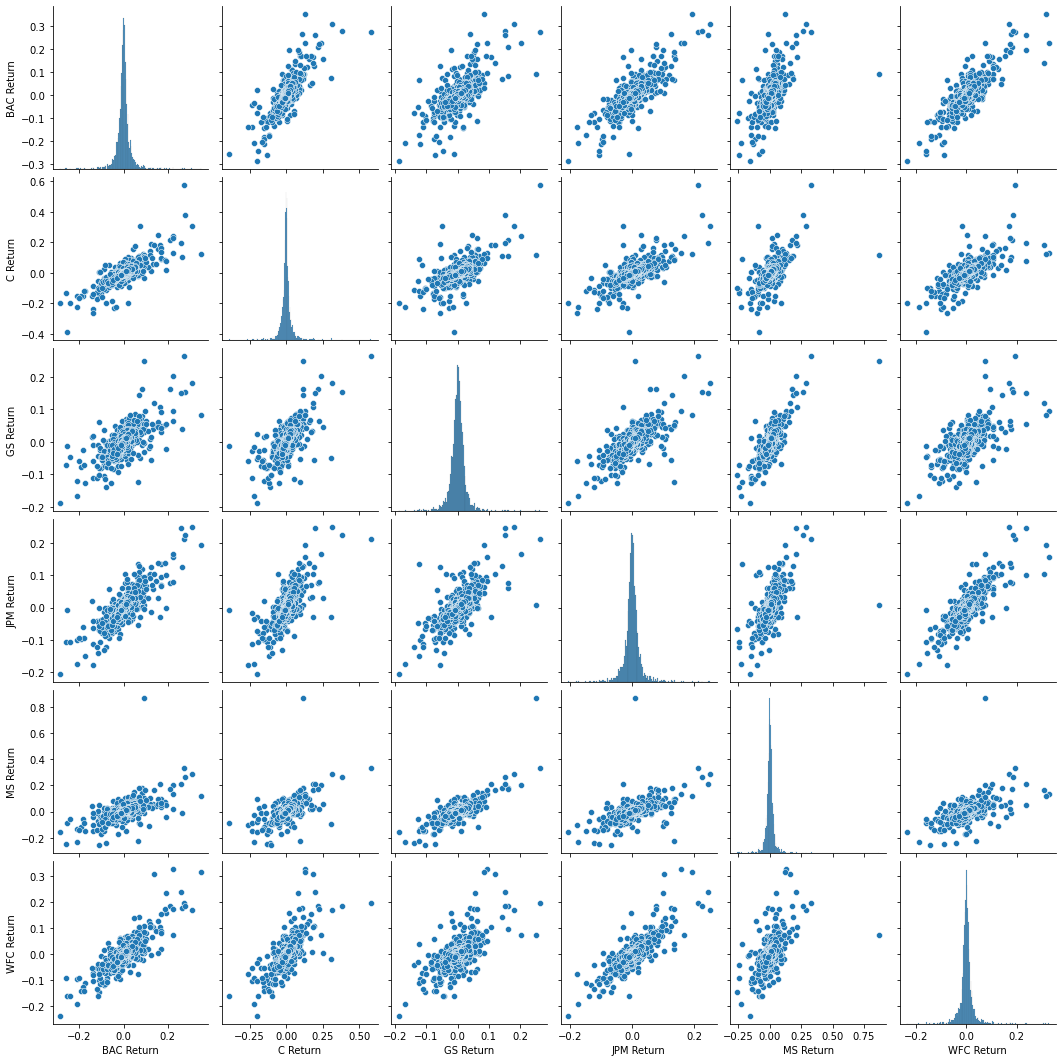

In [122]:
sns.pairplot(returns[1:])

In [123]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [124]:
returns.min()

BAC Return   -0.289694
C Return     -0.390244
GS Return    -0.189596
JPM Return   -0.207274
MS Return    -0.258929
WFC Return   -0.238223
dtype: float64

In [125]:
returns['BAC Return'].argmin()

766

In [126]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [127]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [128]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [131]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

/home/harshi/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS Return', ylabel='Density'>

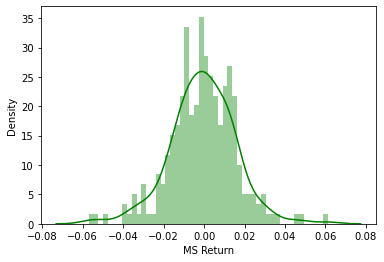

In [135]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=50)

/home/harshi/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C Return', ylabel='Density'>

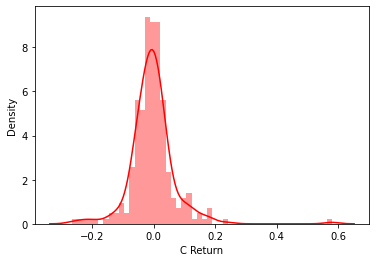

In [138]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=50)

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

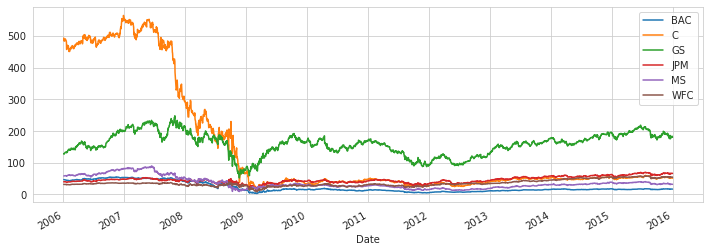

In [140]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))
plt.legend()

<AxesSubplot:xlabel='Date'>

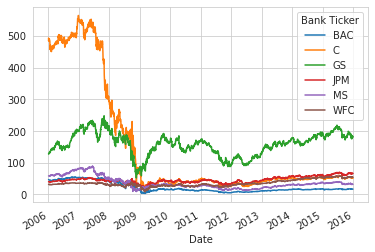

In [141]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [143]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

In [144]:
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,33.584072
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,33.227406
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,33.270187
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,33.220268
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,33.241653


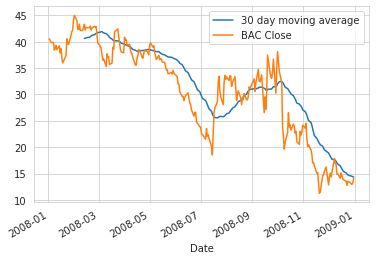

In [145]:
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day moving average')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()

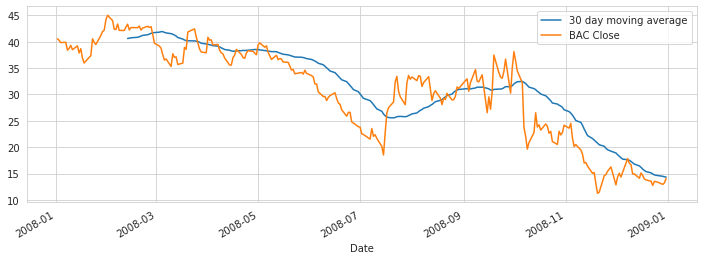

In [146]:
plt.figure(figsize=(12,4))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day moving average')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

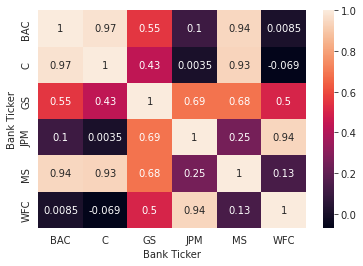

In [149]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

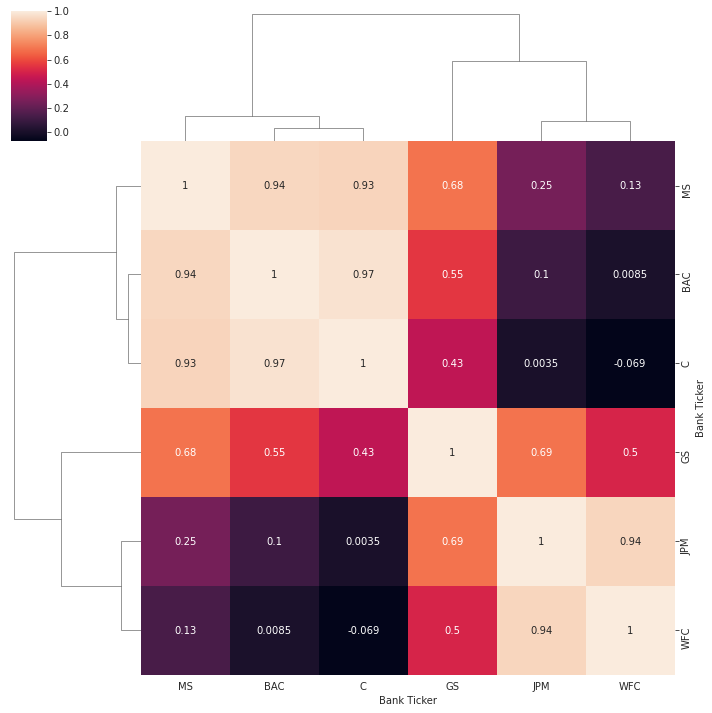

In [150]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [152]:
close_curr=bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()

In [154]:
close_curr.iplot(kind='heatmap',colorscale='rdylbu')

In [155]:
BAC

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,33.584072
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,33.227406
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,33.270187
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,33.220268
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,33.241653
...,...,...,...,...,...,...
2015-12-24,17.379999,17.219999,17.320000,17.270000,29369400.0,15.193916
2015-12-28,17.230000,16.980000,17.219999,17.129999,41777500.0,15.070746
2015-12-29,17.350000,17.160000,17.250000,17.280001,45670400.0,15.202714


In [156]:
bac15=BAC[['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01']
bac15.iplot(kind='candle')

In [157]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55])

In [158]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')